In [1]:
import darshan
import pprint

from darshan.experimental.plots.matplotlib import plot_access_histogram
from darshan.experimental.plots.matplotlib import plot_opcounts

darshan.enable_experimental(verbose=True)

Added method create_time_summary to DarshanReport.
Added method print_module_records to DarshanReport.
Added method summarize to DarshanReport.
Added method create_timeline to DarshanReport.
Added method reduce to DarshanReport.
Added method agg_ioops to DarshanReport.
Added method create_sankey to DarshanReport.
Added method filter to DarshanReport.
Added method mod_agg_iohist to DarshanReport.
Added method name_records_summary to DarshanReport.


### Report Algebra

By overloading the addition operator, reports can be easily merge for a variety of counters.

Some choices to make though

In [2]:
r1 = darshan.DarshanReport("sample.darshan", read_all=True)
r2 = darshan.DarshanReport("noposix.darshan", read_all=True)
r3 = darshan.DarshanReport("sample-badost.darshan", read_all=True)

In [10]:
r1.name_records_summary()

{6301063301082038805: {'POSIX': 1, 'MPI-IO': 1},
 15920181672442173319: {'STDIO': 1},
 7238257241479193519: {'STDIO': 128}}

In [12]:
r1.name_records[6301063301082038805]

'/scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5'

In [13]:
r1.filter(name_records=['/scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5'])

dict_keys(['POSIX', 'MPI-IO', 'STDIO'])
[6301063301082038805]


{'POSIX': [{'id': 6301063301082038805,
   'rank': -1,
   'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                             0,                16402,                16404,
                             0,                    0,                    0,
                             0, 18446744073709551615, 18446744073709551615,
                             0,                    0,                    0,
                 2199023259968,                    0,        2199023261831,
                             0,                    0,                    0,
                         16384,                    0,                    0,
                             8,                16401,              1048576,
                             0,            134217728,                    0,
                             0,                    0,                    0,
                             0,                    0,                    0,
                      

In [9]:
r1.filter(name_records=[6301063301082038805])

dict_keys(['POSIX', 'MPI-IO', 'STDIO'])
[6301063301082038805]


{'POSIX': [{'id': 6301063301082038805,
   'rank': -1,
   'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                             0,                16402,                16404,
                             0,                    0,                    0,
                             0, 18446744073709551615, 18446744073709551615,
                             0,                    0,                    0,
                 2199023259968,                    0,        2199023261831,
                             0,                    0,                    0,
                         16384,                    0,                    0,
                             8,                16401,              1048576,
                             0,            134217728,                    0,
                             0,                    0,                    0,
                             0,                    0,                    0,
                      

In [5]:
r1.reduce(mods=['STDIO'], name_records='unique')

['STDIO']
[14734109647742566553, 15920181672442173319, 7238257241479193519, 6301063301082038805]


{'STDIO': {15920181672442173319: array([                   1, 18446744073709551615,                    0,
                            6,                    0,                    0,
                          280,                    0,                    0,
                          279,                    0,                    0,
                            0], dtype=uint64),
  7238257241479193519: array([                 128, 18446744073709551488,                    0,
                           68,                    0,                    0,
                         3029,                    0,                    0,
                         3028,                    0,                    0,
                            0], dtype=uint64)}}

In [12]:
r1.modules

{'POSIX': {'len': 186, 'ver': 3, 'idx': 1, 'num_records': 1},
 'MPI-IO': {'len': 154, 'ver': 2, 'idx': 2, 'num_records': 1},
 'LUSTRE': {'len': 87, 'ver': 1, 'idx': 6},
 'STDIO': {'len': 3234, 'ver': 1, 'idx': 7, 'num_records': 129}}

Summarizing... agg_ioops


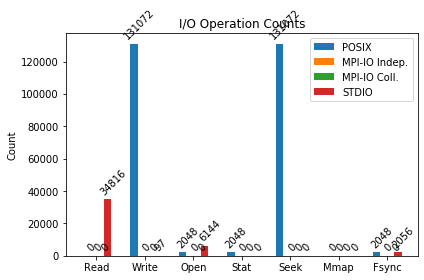

In [3]:
for r in [r1, r2, r3]:
    print(r.modules.keys())

dict_keys(['POSIX', 'MPI-IO', 'LUSTRE', 'STDIO'])
dict_keys(['LUSTRE', 'STDIO'])
dict_keys(['POSIX', 'LUSTRE', 'STDIO'])


In [4]:
for r in [r1, r2, r3]:
    r.read_all()
    pprint.pprint(r.name_records_summary())

{6301063301082038805: {'MPI-IO': 1, 'POSIX': 1},
 7238257241479193519: {'STDIO': 128},
 15920181672442173319: {'STDIO': 1}}
{4779127337200928093: {'STDIO': 1}, 15920181672442173319: {'STDIO': 1}}
{26087561319006792: {'POSIX': 1},
 32336112876553699: {'POSIX': 1},
 42104479662815832: {'POSIX': 1},
 47495459565550737: {'POSIX': 1},
 65347426971736389: {'POSIX': 1},
 86328263262786552: {'POSIX': 1},
 95699419353302353: {'POSIX': 1},
 99646431389784016: {'POSIX': 1},
 131910297086589702: {'POSIX': 1},
 152785680145013090: {'POSIX': 1},
 164030895485709092: {'POSIX': 1},
 166601232038096764: {'POSIX': 1},
 184910861520199219: {'POSIX': 1},
 197243659231530506: {'POSIX': 1},
 198977548761204876: {'POSIX': 1},
 199139187432971630: {'POSIX': 1},
 212550184066097712: {'POSIX': 1},
 222178773594929071: {'POSIX': 1},
 230735611907126702: {'POSIX': 1},
 235988878702748691: {'POSIX': 1},
 236164178082797730: {'POSIX': 1},
 241132494866587107: {'POSIX': 1},
 241743493901721607: {'POSIX': 1},
 246106

 2974056952212083059: {'POSIX': 1},
 2975325749028352240: {'POSIX': 1},
 2976648710758130848: {'POSIX': 1},
 2986432497675761946: {'POSIX': 1},
 2993485597467734907: {'POSIX': 1},
 2996520416541451734: {'POSIX': 1},
 2996687903484608694: {'POSIX': 1},
 2998887714861018986: {'POSIX': 1},
 3006181881764915815: {'POSIX': 1},
 3015944347714159389: {'POSIX': 1},
 3015995215801489535: {'POSIX': 1},
 3017262935341878862: {'POSIX': 1},
 3034856518441804969: {'POSIX': 1},
 3036006867992352860: {'POSIX': 1},
 3064737824728060528: {'POSIX': 1},
 3065946495398765994: {'POSIX': 1},
 3066531644624478197: {'POSIX': 1},
 3103313501715860698: {'POSIX': 1},
 3103761477601487265: {'POSIX': 1},
 3116653792292637915: {'POSIX': 1},
 3117060035806612281: {'POSIX': 1},
 3121525641359337768: {'POSIX': 1},
 3135086901403777856: {'POSIX': 1},
 3137181533187002806: {'POSIX': 1},
 3150901124052873347: {'POSIX': 1},
 3169463312297786190: {'POSIX': 1},
 3172815449006368707: {'POSIX': 1},
 3178469066989203224: {'POSI

 13296017248887183884: {'POSIX': 1},
 13322295610870120655: {'POSIX': 1},
 13324141753382253127: {'POSIX': 1},
 13328802030991216262: {'POSIX': 1},
 13361077649439223747: {'POSIX': 1},
 13373945657540749601: {'POSIX': 1},
 13384333298547776351: {'POSIX': 1},
 13389221922949286166: {'POSIX': 1},
 13389435077067079194: {'POSIX': 1},
 13391544970887079811: {'POSIX': 1},
 13397046965233287632: {'POSIX': 1},
 13399412567483012590: {'POSIX': 1},
 13400364655384296616: {'POSIX': 1},
 13404116586427975891: {'POSIX': 1},
 13406444351123449578: {'POSIX': 1},
 13453135278106459984: {'POSIX': 1},
 13453670383433512059: {'POSIX': 1},
 13456026822866474816: {'POSIX': 1},
 13496906593873199003: {'POSIX': 1},
 13500401682613428828: {'POSIX': 1},
 13522279604896840304: {'POSIX': 1},
 13529521073958543975: {'POSIX': 1},
 13534997425642149784: {'POSIX': 1},
 13535178093486600454: {'POSIX': 1},
 13543865690162003841: {'POSIX': 1},
 13551123458442173315: {'POSIX': 1},
 13556497333102772096: {'POSIX': 1},
 

In [5]:
[r1.metadata, r2.metadata, r3.metadata]

[{'start_time': 1490000867,
  'end_time': 1490000983,
  'job': {'uid': 69615,
   'start_time': 1490000867,
   'end_time': 1490000983,
   'nprocs': 2048,
   'jobid': 4478544,
   'metadata': {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}},
  'exe': '/global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32'},
 {'start_time': 1514923055,
  'end_time': 1514962267,
  'job': {'uid': 996599276,
   'start_time': 1514923055,
   'end_time': 1514962267,
   'nprocs': 512,
   'jobid': 83017637,
   'metadata': {'lib_ver': '3.1.4', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}},
  'exe': '160345792'},
 {'start_time': 1497980979,
  'end_time': 1497981758,
  'job': {'uid': 69615,
   'start_time': 1497980979,
   'end_time': 1497981758,
   'nprocs': 2048,
   'jobid': 6265799,
   'metadata': {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}},
  'exe': '/global/project/projectdirs/m888/glock/t

In [6]:
c = r1 + r2
c.metadata

{'start_time': 1490000867, 'end_time': 1514962267}

In [7]:
r3.data['name_records']

{14734109647742566553: '<STDIN>',
 15920181672442173319: '<STDOUT>',
 7238257241479193519: '<STDERR>',
 17513754861097716158: '/global/project/projectdirs/m888/glock/tokio-abc-results/inputs/posix1m2.in',
 9824122893155790763: '/scratch1/scratchdirs/glock/test-scratch1/ior-posix.out.00000000',
 2205843483795533762: '/scratch1/scratchdirs/glock/test-scratch1/ior-posix.out.00000001',
 8164368210574269509: '/scratch1/scratchdirs/glock/test-scratch1/ior-posix.out.00000002',
 6463177200517351881: '/scratch1/scratchdirs/glock/test-scratch1/ior-posix.out.00000003',
 4499191601322190681: '/scratch1/scratchdirs/glock/test-scratch1/ior-posix.out.00000004',
 6141913565723351655: '/scratch1/scratchdirs/glock/test-scratch1/ior-posix.out.00000005',
 17124951025315363982: '/scratch1/scratchdirs/glock/test-scratch1/ior-posix.out.00000006',
 581091241351962606: '/scratch1/scratchdirs/glock/test-scratch1/ior-posix.out.00000007',
 4999027365786614762: '/scratch1/scratchdirs/glock/test-scratch1/ior-posix.

In [8]:
counts = {}

for mod, records in r1.records.items():
    for rec in records:
        if rec['id'] not in counts:
            counts[rec['id']] = {}
            
        ctx = counts[rec['id']]
        if mod not in ctx:
            ctx[mod] = 1
        else:
            ctx[mod] += 1
            
counts

{6301063301082038805: {'POSIX': 1, 'MPI-IO': 1},
 15920181672442173319: {'STDIO': 1},
 7238257241479193519: {'STDIO': 128}}

Summarizing... agg_ioops


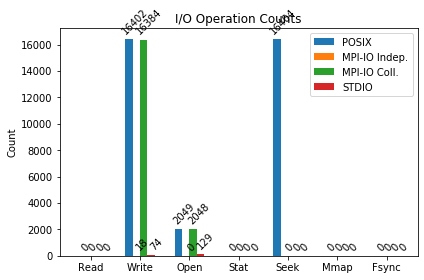

In [18]:
plot_opcounts(r1)

[('POSIX', 2048), ('STDIO', 3)]
Summarizing... iohist POSIX


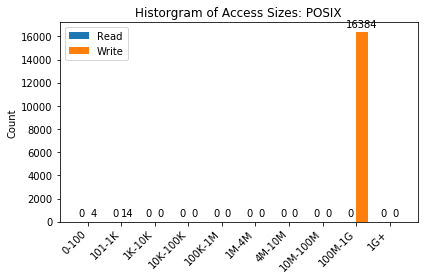

In [10]:
r3.mod_read_all_records("POSIX")
print([(key, len(val)) for key, val in r3.records.items()])
plot_access_histogram(c, 'POSIX')

[('STDIO', 2)]
Summarizing... agg_ioops


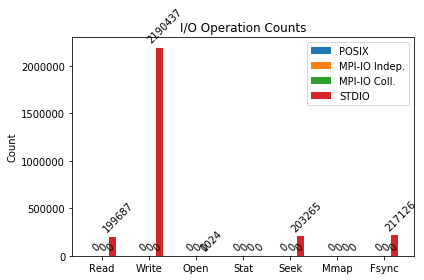

In [11]:
r2.mod_read_all_records("STDIO")
print([(key, len(val)) for key, val in r2.records.items()])
#plot_access_histogram(c, 'POSIX')
plot_opcounts(r2)

[('POSIX', 2048), ('STDIO', 3), ('MPI-IO', 0)]
Summarizing... iohist MPI-IO


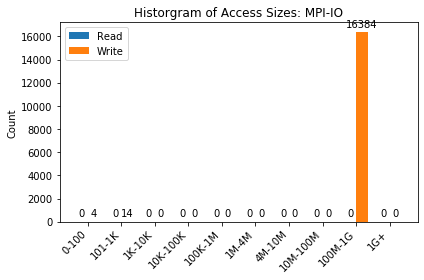

In [23]:
r1.mod_read_all_records("MPI-IO")
print([(key, len(val)) for key, val in r3.records.items()])
plot_access_histogram(c, 'MPI-IO')

[('STDIO', 729), ('POSIX', 4097), ('MPI-IO', 1)]
Summarizing... agg_ioops


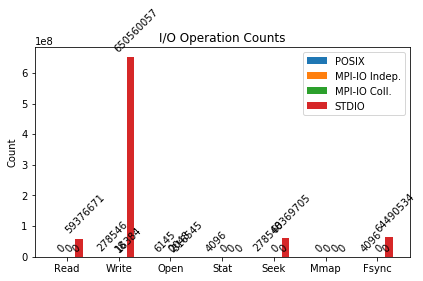

In [19]:
c = r2 + r2 + r2 + r2 + r2 + r2 + r2 + r2 + r2  # inflate stdio
c = c + c + c + c + c + c + c + c + c + c + c   # inflate stdio
c = c + c + c + r1 + r3 + r3

print([(key, len(val)) for key, val in c.records.items()])
#plot_access_histogram(c, 'POSIX')
plot_opcounts(c)

In [ ]:
combined = r1 + r2
[(key, len(val)) for key, val in combined.records.items()]

## Aggregations and Summaries

Added method create_time_summary to DarshanReport.
Added method summarize to DarshanReport.
Added method create_timeline to DarshanReport.
Added method agg_ioops to DarshanReport.
Added method create_sankey to DarshanReport.
Added method mod_agg_iohist to DarshanReport.


Added method create_time_summary to DarshanReport.
Added method summarize to DarshanReport.
Added method create_timeline to DarshanReport.
Added method agg_ioops to DarshanReport.
Added method create_sankey to DarshanReport.
Added method mod_agg_iohist to DarshanReport.
self: <darshan.report.DarshanReport object at 0x7f253fa7cf60>
filter: None
data: None
summarizing... iohist POSIX


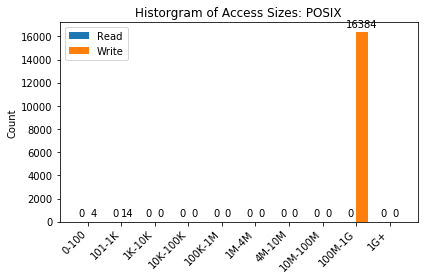

In [4]:
import darshan
darshan.enable_experimental()

r3 = darshan.DarshanReport("example.darshan")
r3.mod_read_all_records('POSIX')
r3.mod_read_all_records('MPI-IO')


from darshan.experimental.plots.matplotlib import plot_access_histogram
plot_access_histogram(r3, mod='POSIX')

In [23]:
r3.mod_agg_iohist('POSIX')

In [24]:
r3.data

{'version': 1,
 'metadata': {'job': {'jobid': 4478544,
   'uid': 69615,
   'start_time': 1490000867,
   'end_time': 1490000983,
   'metadata': {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}},
  'exe': '/global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32'},
 'records': {'POSIX': [{'id': 6301063301082038805,
    'rank': -1,
    'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                              0,                16402,                16404,
                              0,                    0,                    0,
                              0, 18446744073709551615, 18446744073709551615,
                              0,                    0,                    0,
                  2199023259968,                    0,        2199023261831,
                              0,                    0,                    0,
             

In [9]:
darshan.enable_experimental()
dir(r3)

Added method create_time_summary to DarshanReport.
Added method summarize to DarshanReport.
Added method create_timeline to DarshanReport.
Added method agg_ioops to DarshanReport.
Added method create_sankey to DarshanReport.
Added method mod_agg_iohist to DarshanReport.


['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'agg_ioops',
 'as_json',
 'automatic_summary',
 'convert_records',
 'converted_records',
 'create_sankey',
 'create_time_summary',
 'create_timeline',
 'data',
 'data_format',
 'data_revision',
 'filename',
 'log',
 'mod_agg',
 'mod_agg_iohist',
 'mod_read_all_dxt_records',
 'mod_read_all_records',
 'provenance_log',
 'provenance_reports',
 'read_all',
 'read_all_dxt_records',
 'read_all_generic_records',
 'read_metadata',
 'record_provenance',
 'records',
 'summarize',
 'summary',
 'summary_revision']

In [11]:
combined.summarize()

In [12]:
combined.data

{'version': 1,
 'metadata': {},
 'records': {'POSIX': [{'id': 6301063301082038805,
    'rank': -1,
    'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                              0,                16402,                16404,
                              0,                    0,                    0,
                              0, 18446744073709551615, 18446744073709551615,
                              0,                    0,                    0,
                  2199023259968,                    0,        2199023261831,
                              0,                    0,                    0,
                          16384,                    0,                    0,
                              8,                16401,              1048576,
                              0,            134217728,                    0,
                              0,                    0,                    0,
                              0,          

In [5]:
combined.data['agg_iohist']

NameError: name 'combined' is not defined

In [10]:
combined.data

{'version': 1,
 'metadata': {},
 'records': {'POSIX': [{'id': 6301063301082038805,
    'rank': -1,
    'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                              0,                16402,                16404,
                              0,                    0,                    0,
                              0, 18446744073709551615, 18446744073709551615,
                              0,                    0,                    0,
                  2199023259968,                    0,        2199023261831,
                              0,                    0,                    0,
                          16384,                    0,                    0,
                              8,                16401,              1048576,
                              0,            134217728,                    0,
                              0,                    0,                    0,
                              0,          

## Internal Identity Checks

In [33]:
# check if copy.copy is sufficient (ok on this level.. but!)
id(r1.records['POSIX']) == id(combined.records['POSIX'])

False

In [34]:
# check if copy.copy is sufficient (potential conflict for this level?)
# The question has to be, if we assume people to modify a log record
# I'd tend to say no, and document that with a warning somewhere
id(r1.records['POSIX'][0]) == id(combined.records['POSIX'][0])

True

## Data Inspection

In [12]:
r1.data

{'version': 1,
 'metadata': {'job': {'jobid': 4478544,
   'uid': 69615,
   'start_time': 1490000867,
   'end_time': 1490000983,
   'metadata': {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}},
  'exe': '/global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32',
  'mounts': [('/.shared/base/default/etc/dat.conf', 'dvs'),
   ('/usr/lib64/libibverbs.so.1.0.0', 'dvs'),
   ('/usr/lib64/libibumad.so.3.0.2', 'dvs'),
   ('/usr/lib64/librdmacm.so.1.0.0', 'dvs'),
   ('/usr/lib64/libibgni.so.1.0.0', 'dvs'),
   ('/global/cscratch1', 'lustre'),
   ('/global/projectb', 'dvs'),
   ('/global/projecta', 'dvs'),
   ('/usr/sbin/ibstat', 'dvs'),
   ('/global/project', 'dvs'),
   ('/global/common', 'dvs'),
   ('/global/syscom', 'dvs'),
   ('/global/dna', 'dvs'),
   ('/opt/slurm', 'dvs'),
   ('/global/u1', 'dvs'),
   ('/global/u2', 'dvs'),
   ('/scratch1', 'lustre'),
   ('/scratch2', 'lustre'),
   ('/sc

In [13]:
r1.data

{'version': 1,
 'metadata': {'job': {'jobid': 4478544,
   'uid': 69615,
   'start_time': 1490000867,
   'end_time': 1490000983,
   'metadata': {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}},
  'exe': '/global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32',
  'mounts': [('/.shared/base/default/etc/dat.conf', 'dvs'),
   ('/usr/lib64/libibverbs.so.1.0.0', 'dvs'),
   ('/usr/lib64/libibumad.so.3.0.2', 'dvs'),
   ('/usr/lib64/librdmacm.so.1.0.0', 'dvs'),
   ('/usr/lib64/libibgni.so.1.0.0', 'dvs'),
   ('/global/cscratch1', 'lustre'),
   ('/global/projectb', 'dvs'),
   ('/global/projecta', 'dvs'),
   ('/usr/sbin/ibstat', 'dvs'),
   ('/global/project', 'dvs'),
   ('/global/common', 'dvs'),
   ('/global/syscom', 'dvs'),
   ('/global/dna', 'dvs'),
   ('/opt/slurm', 'dvs'),
   ('/global/u1', 'dvs'),
   ('/global/u2', 'dvs'),
   ('/scratch1', 'lustre'),
   ('/scratch2', 'lustre'),
   ('/sc

In [14]:
r1.data['records']['POSIX']

[{'id': 6301063301082038805,
  'rank': -1,
  'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                            0,                16402,                16404,
                            0,                    0,                    0,
                            0, 18446744073709551615, 18446744073709551615,
                            0,                    0,                    0,
                2199023259968,                    0,        2199023261831,
                            0,                    0,                    0,
                        16384,                    0,                    0,
                            8,                16401,              1048576,
                            0,            134217728,                    0,
                            0,                    0,                    0,
                            0,                    0,                    0,
                            0,               

In [15]:
r2.data['records']['MPI-IO']

[{'id': 6301063301082038805,
  'rank': -1,
  'counters': array([            0,          2048,             0,            18,
                     0,         16384,             0,             0,
                     0,             0,             0,             0,
                 32768,             9,             0, 2199023259968,
                     0,             0,     134217728,             0,
                     0,             0,             0,             0,
                     0,             0,             0,             0,
                     0,             4,            14,             0,
                     0,             0,             0,             0,
                     0,         16384,             0,     134217728,
                   272,           544,           328,         16384,
                     8,             2,             2,           597,
            1073741824,          1312,    1073741824], dtype=uint64),
  'fcounters': array([0.00000000e+00, 2.0480000

## Provenance

The report object maintains a provenance log to investigate and trace aggregations (recording can be disabled by changing `record_provenance` to `False`). Two indexes are maintained:

* A list of all included sub-reports which hold records in the current report
* A list of all alterings/filterings performed on the current report with timestamps/revision

In [11]:
c.provenance_log

[('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 571988)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572020)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572042)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572062)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572080)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572099)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572117)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572134)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572240)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572267)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572295)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572329)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572363)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572398)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572435)),
 ('add',
  datetime.datetime(2020, 4, 12, 2, 2, 58, 572475)),
 ('add',

In [25]:
len(combined.provenance_reports)

NameError: name 'combined' is not defined

In [23]:
combined.provenance_log

NameError: name 'combined' is not defined